Modelo de regresion logistica para predecir la victoria o la derrota del equipo anfitrion de baloncesto, utilizando como 
variable dependiente el Home_Team_Win y las variables explicativas: asistecias, tapones, tiros de campo, tiros de tres puntos y
tiros libres. Cada una de las variables explicativas de los respectivos equipos, tanto del visitante como del anfitrion. Ademas
se realizaran mas modelos de clasificacion para asi escoger el de mayor precision: SVM, KNN, Random Forest.

In [154]:
#Importamos todas las librerias necesarias para los modelos de clasificaciones

%matplotlib inline
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from scipy.stats import f_oneway, f

import statsmodels.api as sm
from statsmodels.formula.api import ols 

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
import seaborn as sb

from scipy.stats import norm

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn import neighbors

In [155]:
df = pd.read_csv('data_nba_clean.csv')

In [156]:
df

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,AST_away,REB_away,HOME_TEAM_WINS,year,pts_totals,ast_totals,fg_totals,rb_totals,fg3_totals,ft_totals
0,0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,...,21.0,46.0,0,2022,217.0,44.0,0.820,99.0,0.690,1.635
1,1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,...,19.0,40.0,1,2022,192.0,39.0,0.862,86.0,0.637,1.757
2,2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,...,23.0,47.0,0,2022,227.0,51.0,0.901,99.0,0.713,1.813
3,3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,...,27.0,39.0,1,2022,231.0,60.0,0.897,94.0,0.786,1.629
4,4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,...,28.0,50.0,0,2022,242.0,60.0,1.022,89.0,0.794,1.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25692,25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,...,17.0,43.0,1,2014,180.0,41.0,0.785,93.0,0.796,1.464
25693,25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,...,17.0,47.0,0,2014,166.0,35.0,0.749,87.0,0.648,1.355
25694,25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,...,19.0,43.0,1,2014,193.0,48.0,0.835,88.0,1.000,1.341
25695,25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,...,18.0,45.0,1,2014,193.0,39.0,0.909,75.0,0.718,1.496


In [157]:
#Eliminamos la columna unname
df.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25697 non-null  object 
 1   GAME_ID           25697 non-null  int64  
 2   GAME_STATUS_TEXT  25697 non-null  object 
 3   HOME_TEAM_ID      25697 non-null  int64  
 4   VISITOR_TEAM_ID   25697 non-null  int64  
 5   SEASON            25697 non-null  int64  
 6   TEAM_ID_home      25697 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25697 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

In [159]:
#Variables objetivos a utilizar para nuestros modelos
df_models = df[['FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
                'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'HOME_TEAM_WINS']]

In [160]:
df_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FG_PCT_away     25697 non-null  float64
 1   FT_PCT_away     25697 non-null  float64
 2   FG3_PCT_away    25697 non-null  float64
 3   AST_away        25697 non-null  float64
 4   REB_away        25697 non-null  float64
 5   FG_PCT_home     25697 non-null  float64
 6   FT_PCT_home     25697 non-null  float64
 7   FG3_PCT_home    25697 non-null  float64
 8   AST_home        25697 non-null  float64
 9   REB_home        25697 non-null  float64
 10  HOME_TEAM_WINS  25697 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 2.2 MB


In [161]:
y = df_models['HOME_TEAM_WINS']
X = df_models.drop(columns=['HOME_TEAM_WINS'])

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [163]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [164]:
y_pred_lr = lr.predict(X_test)

In [165]:
lr.score(X_train, y_train)

0.8395680303546237

In [166]:
lr.score(X_test, y_test)

0.8433852140077821

In [167]:
mean_squared_error(y_pred_lr, y_test)

0.1566147859922179

In [169]:
#cross-validation utilizando 18 particiones de nuestros datos del modelo

In [170]:
score_validation = cross_val_score(lr, X, y, scoring = 'accuracy', cv = 18)

In [171]:
score_validation

array([0.85364146, 0.84803922, 0.83123249, 0.84593838, 0.83543417,
       0.85994398, 0.84733894, 0.84313725, 0.83823529, 0.82072829,
       0.82002801, 0.82410652, 0.83321654, 0.84512964, 0.84162579,
       0.84092502, 0.84442887, 0.83111423])

In [172]:
score_validation.mean()

0.8391246711251656

In [173]:
#Hiperparametros Multiclase para observar la precision de certitud de nuestro modelo

In [174]:
metrics.precision_score(y_test, y_pred_lr, average='macro')

0.839310769085166

In [175]:
metrics.precision_score(y_test, y_pred_lr, average='micro')

0.8433852140077821

In [176]:
metrics.precision_score(y_test, y_pred_lr, average='weighted')

0.8429026098518995

In [177]:
metrics.recall_score(y_test, y_pred_lr, average='weighted')

0.8433852140077821

In [178]:
metrics.f1_score(y_test, y_pred_lr, average='weighted')

0.8430219050897751

In [179]:
#Matrix de confusion y de certitud de las predicciones

In [180]:
confusion_matrix(y_test, y_pred_lr)

array([[1683,  433],
       [ 372, 2652]], dtype=int64)

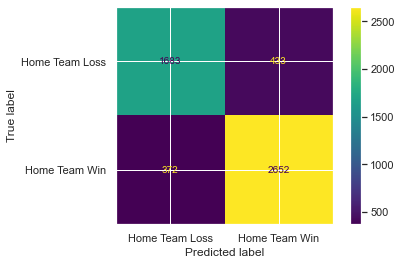

In [181]:
Labels = ['Home Team Loss', 'Home Team Win']

metrics.plot_confusion_matrix(lr, X_test, y_test, display_labels=Labels);

In [182]:
prec = 2633 / (2633 + 365)
print(prec)

0.8782521681120747


In [183]:
class_names = ['Home Team Loss', 'Home Team Win']

print(classification_report(y_train, lr.predict(X_train), target_names=class_names))

print('%%%%'*30)
print()

print(classification_report(y_test, y_pred_lr, target_names=class_names))


                precision    recall  f1-score   support

Home Team Loss       0.82      0.78      0.80      8426
 Home Team Win       0.85      0.88      0.87     12131

      accuracy                           0.84     20557
     macro avg       0.84      0.83      0.83     20557
  weighted avg       0.84      0.84      0.84     20557

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                precision    recall  f1-score   support

Home Team Loss       0.82      0.80      0.81      2116
 Home Team Win       0.86      0.88      0.87      3024

      accuracy                           0.84      5140
     macro avg       0.84      0.84      0.84      5140
  weighted avg       0.84      0.84      0.84      5140



In [184]:
#Prediccion de un juego de post-temporada 2021-2022 entre Dallas Mavericks vs Golden State Warriors

In [192]:
X.head(1)

,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
0,0.422,0.875,0.357,21.0,46.0,0.398,0.76,0.333,23.0,53.0


In [195]:
new_data = np.array([[0.44, 0.77, 0.37, 19.0, 36.6, 0.49, 0.74, 0.37, 27.8, 44.3]])

In [196]:
lr.predict(new_data)

array([1], dtype=int64)

In [188]:
lr.predict_proba(X)[::, 1]

array([0.51382013, 0.93507401, 0.22315935, ..., 0.92244737, 0.20220338,
       0.27014174])

In [189]:
y_pred_prob = lr.predict_proba(X)[::, 1]
y_pred_prob

array([0.51382013, 0.93507401, 0.22315935, ..., 0.92244737, 0.20220338,
       0.27014174])

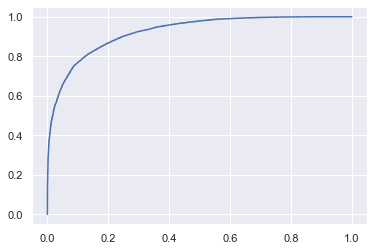

In [190]:
# False positive rate 
# True positive rate
fpr, tpr, _  = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)
plt.plot(fpr, tpr);

In [191]:
auc

0.923129333070696

In [27]:
#Modelos de Clasificacion Supervisada para ver el comportamiento de los coeficientes de certitud y determinacion

In [28]:
#DecisionTreeClassifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
X_train.shape

(17987, 10)

In [31]:
params = {'random_state': 0, 'max_depth': 4}
tree_Team = DecisionTreeClassifier(**params)
tree_Team.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [32]:
y_predict_tree = tree_Team.predict(X_test)
y_predict_tree

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [33]:
tree_Team.score(X_train, y_train), tree_Team.score(X_test, y_test)

(0.794240284650025, 0.7800259403372244)

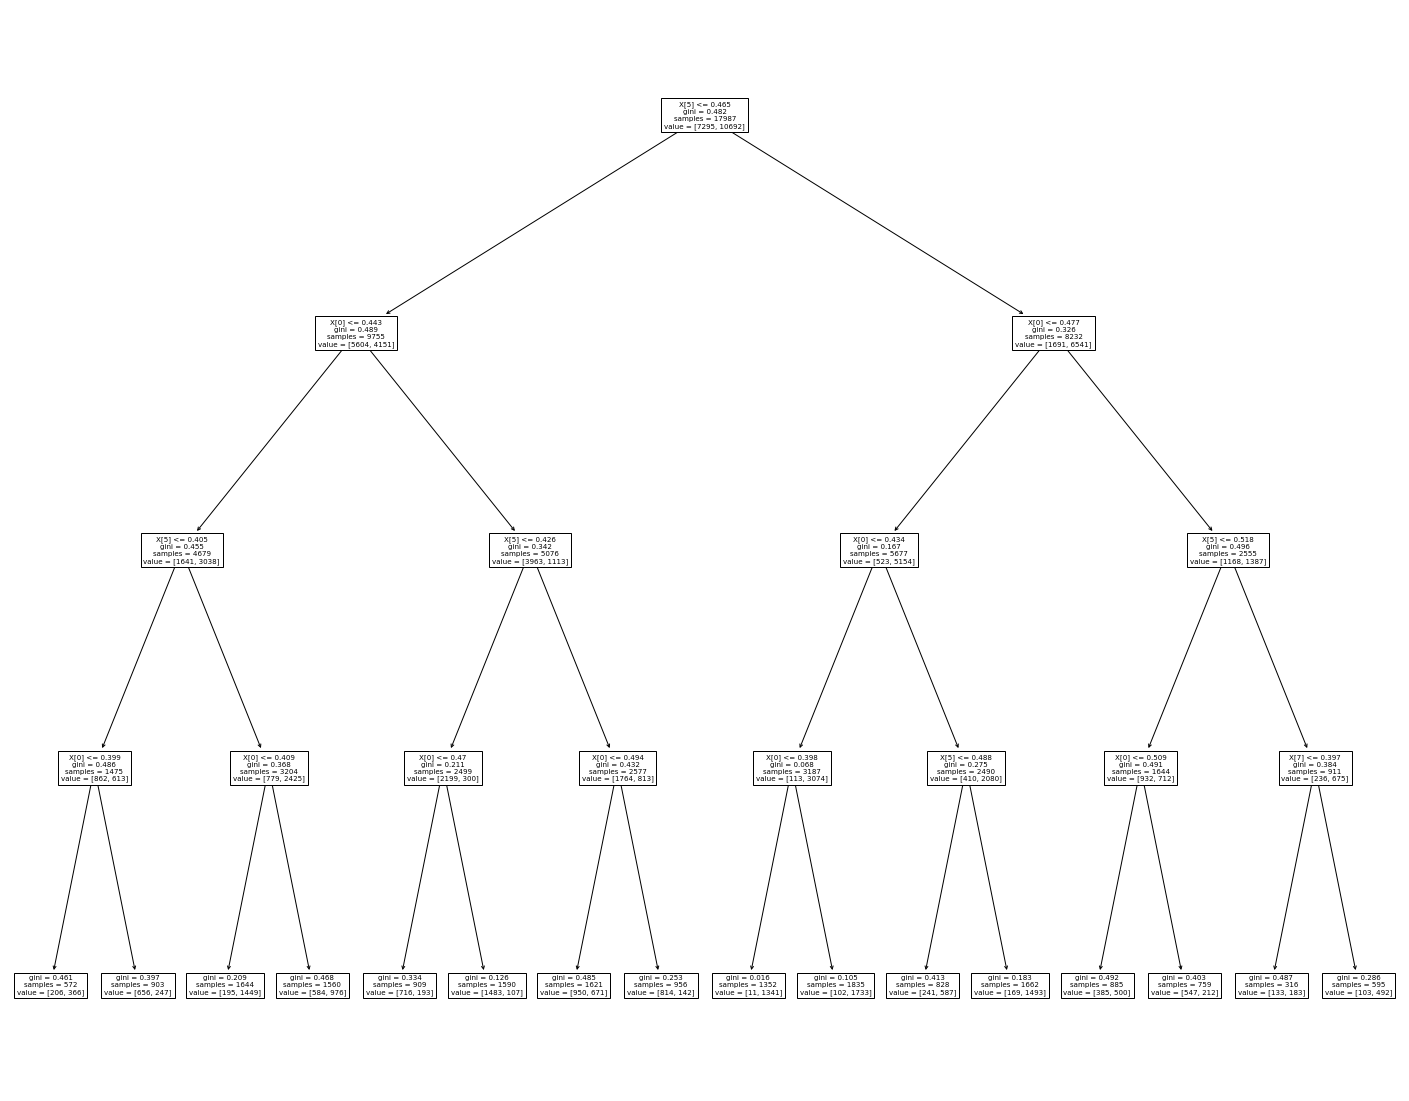

In [34]:
plt.figure(figsize=(25, 20))
fig = tree.plot_tree(tree_Team)

In [35]:
class_names = ['Home Team Loss', 'Home Team Win']

print(classification_report(y_train, tree_Team.predict(X_train), target_names=class_names))

print('%%%%'*30)
print()

print(classification_report(y_test, y_predict_tree, target_names=class_names))

                precision    recall  f1-score   support

Home Team Loss       0.77      0.71      0.74      7295
 Home Team Win       0.81      0.85      0.83     10692

      accuracy                           0.79     17987
     macro avg       0.79      0.78      0.78     17987
  weighted avg       0.79      0.79      0.79     17987

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                precision    recall  f1-score   support

Home Team Loss       0.77      0.68      0.72      3247
 Home Team Win       0.79      0.85      0.82      4463

      accuracy                           0.78      7710
     macro avg       0.78      0.77      0.77      7710
  weighted avg       0.78      0.78      0.78      7710



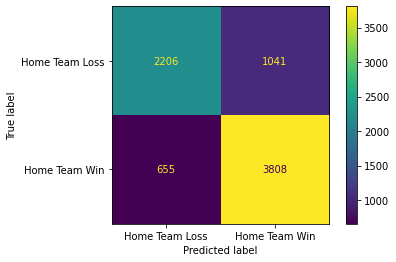

In [36]:
Labels = ['Home Team Loss', 'Home Team Win']

metrics.plot_confusion_matrix(tree_Team, X_test, y_test, display_labels=Labels);

In [37]:
len(X_test)

7710

In [38]:
tree_Team.predict_proba(X_test).shape

(7710, 2)

In [39]:
tree_Team.predict_proba(X_test)[::, 1]

array([0.7089372 , 0.63986014, 0.21232123, ..., 0.99186391, 0.41394201,
       0.62564103])

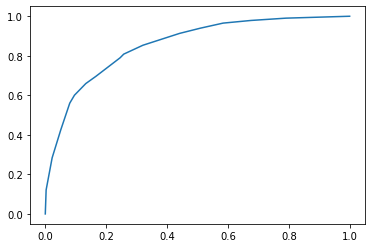

In [40]:
y_pred_prob = tree_Team.predict_proba(X_test)[::, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr);

In [41]:
auc

0.8559397906104195

In [42]:
#Random Forest Classifier

In [106]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [107]:
y_pred_forest = forest.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
df_predict.head()

,Actual,Predicted
21727,1,1
423,1,1
13076,0,1
13352,1,1
1200,1,1


In [108]:
class_names = ['Home Team Loss', 'Home Team Win']
print(classification_report(y_test, y_pred_forest, target_names=class_names ))

                precision    recall  f1-score   support

Home Team Loss       0.82      0.69      0.75      2128
 Home Team Win       0.80      0.89      0.84      3012

      accuracy                           0.81      5140
     macro avg       0.81      0.79      0.80      5140
  weighted avg       0.81      0.81      0.80      5140



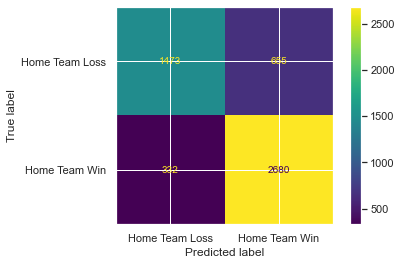

In [109]:
Labels = ['Home Team Loss', 'Home Team Win']

metrics.plot_confusion_matrix(forest, X_test, y_test, display_labels=Labels);

In [ ]:
#Extra Tree Classifier

In [110]:
extra_tree = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=0)
extra_tree.fit(X_train, y_train)
y_pred_extra = extra_tree.predict(X_train)
print(classification_report(y_train, y_pred_extra, target_names=class_names))

                precision    recall  f1-score   support

Home Team Loss       0.92      0.53      0.67      8414
 Home Team Win       0.75      0.97      0.84     12143

      accuracy                           0.79     20557
     macro avg       0.83      0.75      0.76     20557
  weighted avg       0.82      0.79      0.77     20557



In [111]:
extra_tree = ExtraTreesClassifier(n_estimators=100, max_depth=3, random_state=0)
extra_tree.fit(X_train, y_train)
y_pred_extraC = extra_tree.predict(X_test)
print(classification_report(y_test, y_pred_extraC, target_names=class_names))

                precision    recall  f1-score   support

Home Team Loss       0.96      0.38      0.54      2128
 Home Team Win       0.69      0.99      0.81      3012

      accuracy                           0.74      5140
     macro avg       0.83      0.68      0.68      5140
  weighted avg       0.80      0.74      0.70      5140



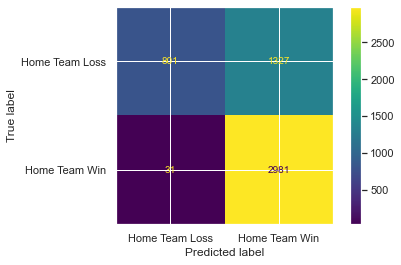

In [112]:
Labels = ['Home Team Loss', 'Home Team Win']

metrics.plot_confusion_matrix(extra_tree, X_test, y_test, display_labels=Labels);

In [113]:
extra_tree.predict_proba(X_test)[::, 1]

array([0.7162306 , 0.65331246, 0.58449511, ..., 0.61703448, 0.65566074,
       0.72376944])

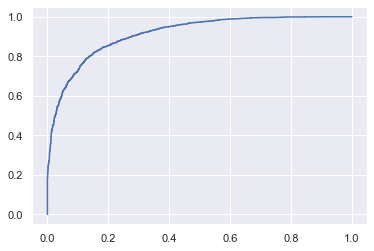

In [114]:
y_pred_prob = extra_tree.predict_proba(X_test)[::, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr);

In [115]:
auc

0.9128779368740576

In [116]:
#SVM

In [117]:
SVM = LinearSVC(random_state=0)
SVM.fit(X_train, y_train)

LinearSVC(random_state=0)

In [118]:
y_pred_SVM = SVM.predict(X_train)
print(classification_report(y_train, y_pred_SVM, target_names=class_names))

                precision    recall  f1-score   support

Home Team Loss       0.63      0.96      0.76      8414
 Home Team Win       0.95      0.62      0.75     12143

      accuracy                           0.76     20557
     macro avg       0.79      0.79      0.76     20557
  weighted avg       0.82      0.76      0.75     20557



In [119]:
y_pred_SVM = SVM.predict(X_test)
print(classification_report(y_test, y_pred_SVM, target_names=class_names))

                precision    recall  f1-score   support

Home Team Loss       0.64      0.95      0.77      2128
 Home Team Win       0.95      0.63      0.75      3012

      accuracy                           0.76      5140
     macro avg       0.80      0.79      0.76      5140
  weighted avg       0.82      0.76      0.76      5140



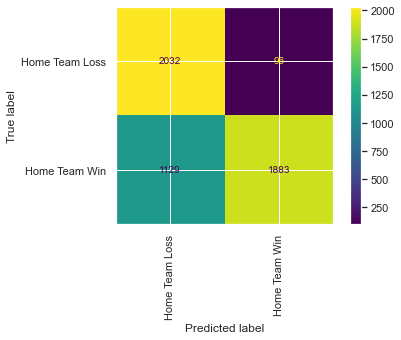

In [120]:
metrics.plot_confusion_matrix(SVM, X_test, y_test,
                              display_labels=['Home Team Loss', 'Home Team Win'],
                              xticks_rotation='vertical')

In [121]:
#KNN K-Nearest Neighbor

In [122]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=30, algorithm='auto',
                                     p=2, metric='euclidean')
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=30)

In [123]:
y_pred_KNN = KNN.predict(X_test)
print(classification_report(y_test, y_pred_KNN, target_names=class_names))

                precision    recall  f1-score   support

Home Team Loss       0.69      0.64      0.67      2128
 Home Team Win       0.76      0.80      0.78      3012

      accuracy                           0.74      5140
     macro avg       0.73      0.72      0.72      5140
  weighted avg       0.73      0.74      0.73      5140



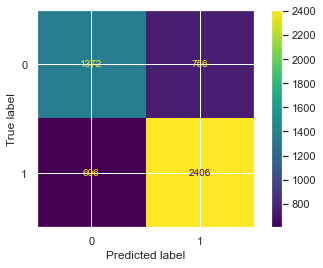

In [124]:
metrics.plot_confusion_matrix(KNN, X_test, y_test)

In [142]:
# Precision
# TP / TP + FP 

2406 / (2406+606)

0.798804780876494

In [126]:
data = [['LR', 0.84],['Forest', 0.81],['Desc_Tree', 0.79],['Extra_Tree', 0.78], ['SVM', 0.74], ['KNN', 0.74]]
data_accuracy = pd.DataFrame(data, columns=['Models', 'Accuracy'])

In [127]:
data_accuracy

,Models,Accuracy
0,LR,0.84
1,Forest,0.81
2,Desc_Tree,0.79
3,Extra_Tree,0.78
4,SVM,0.74
5,KNN,0.74


[Text(0.5, 1.0, 'Accuracy for Every Model')]

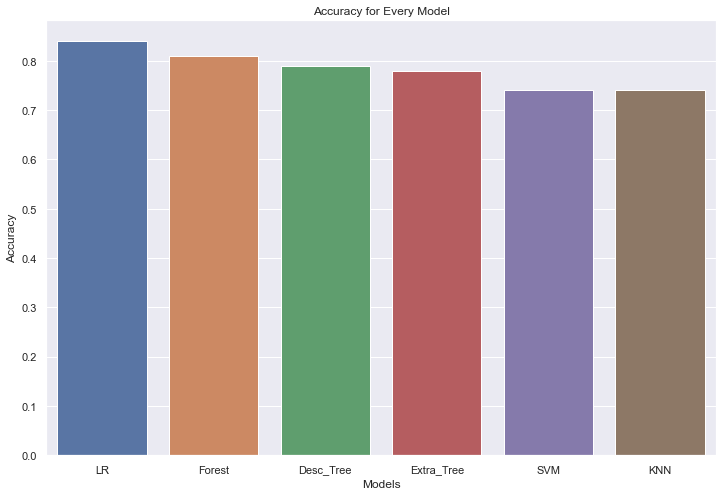

In [130]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

sns.barplot(x="Models", y="Accuracy", data=data_accuracy).set(title='Accuracy for Every Model')